<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,860 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

In [61]:
from sklearn.metrics import mean_squared_error

# 다중회귀분석(Multiple Linear Regression)

In [3]:
import numpy as np

## 다중 회귀 분석 선형 회귀 분석 데이터셋 만들기

* 표준정규분포를 따르는 x_0, x_1을 200개 생성
beta_0 = 1, beta_1 = -0.1, beta_2 = 0.8 이고
노이즈의 분산을 0.4로 하여 y를 생성

$y=1-0.1x_1+0.8x_2+e, e \sim N(0, 0.4)$

In [32]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, eps = 1, -0.3, 0.8, 0.4 # eps는 오차의 분산
y = beta_0 + beta_1 * x_0 + beta_2 * x_1 + np.random.normal(scale=eps**0.5, size=n) 
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758)

x_0, x_1으로 Matrix X를 만든다.

In [5]:
X = np.vstack([x_0, x_1]).T

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

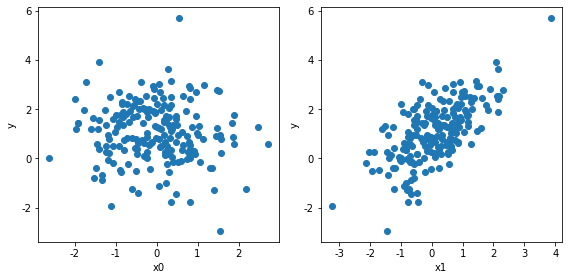

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

# 학습

## 정규방정식

$\beta=(X^TX)^{-1}X^Ty$

In [7]:
X_1 = np.hstack([np.ones((X.shape[0], 1)), X])

In [9]:
gram_matrix = np.matmul(X_1.T, X_1)
inv_gram_matrix = np.linalg.inv(gram_matrix)
beta_hat = np.dot(inv_gram_matrix,  np.dot(X_1.T, y))
beta_hat

array([ 0.96412765, -0.35649907,  0.79192737])

## 경사하강법

$\frac{\partial F}{\partial\beta_0}=\frac{\sum\limits_{i=1}^{n}-(y_i-\beta_0-x_i^T\beta)}{n}$

$\frac{\partial F}{\partial\beta}=\frac{\sum\limits_{i=1}^{n}-x_i(y_i-\beta_0-x_i^T\beta)}{n}$

In [62]:
np.random.seed(42)
beta_hat =  np.random.rand(3) * 2 - 1 # [-1, 1) 까지 랜덤 번호 생성
beta_hat_0 = beta_hat[0]  # 절편을 따로 뗀다
beta_hat = beta_hat[1:] # 절편을 제외한 계수를 beta_hat로 다시 지정한다 
learning_rate = 0.1
epoch = 30
loss_hist = []
beta_hist = []
for j in range(epoch):
    y_delta =  y - beta_hat_0 - np.matmul(X, beta_hat)
    """
    ### Vectorized Operation을 사용하지 않는다면... 
    beta_hat_delta_0 = 0
    beta_hat_delta = np.zeros(2)
    for i in range(X.shape[0]):
        beta_hat_delta_0 += -y_delta[i]
        beta_hat_delta += -X[i] * y_delta[i]
    beta_hat_delta_0 = beta_hat_delta_0 / n
    beta_hat_delta = beta_hat_delta / n
    """
    beta_hat_delta_0 = -np.mean(y_delta)
    #beta_hat_delta = -np.mean(X * y_delta[:, np.newaxis], axis=0)
    beta_hat_delta = -np.dot(X.T, y_delta) / n # 좀 더효율적이고 간결하다
    beta_hat_0 -= learning_rate * beta_hat_delta_0
    beta_hat -= learning_rate * beta_hat_delta
    y_hat = beta_hat_0 + np.matmul(X, beta_hat)
    loss = mean_squared_error(y, y_hat) # mse
    loss_hist.append(loss)
    beta_hist.append((beta_hat_0, beta_hat))

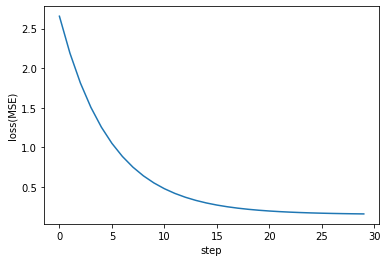

In [63]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

In [22]:
beta_hat_0, beta_hat

(0.9261131158007276, array([-0.27521052,  0.77155434]))

[Question]

1. beta_0(절편)을 따로 분리하지않고 하는 방법은?

2. 왜 beta를 따로 분리했을까?

잠깐] 벡터화 연산(Vectorized Operation) 활용의 중요성

In [24]:
%%timeit

beta_hat_delta_0 = 0
beta_hat_delta = np.zeros(2)
for i in range(X.shape[0]):
    beta_hat_delta_0 += -y_delta[i]
    beta_hat_delta += -X[i] * y_delta[i]
beta_hat_delta_0 = beta_hat_delta_0 / n
beta_hat_delta = beta_hat_delta / n

680 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%%timeit

-np.mean(X * y_delta[:, np.newaxis], axis=0)

15.6 µs ± 373 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
%%timeit

-np.dot(X.T, y_delta) / n

3.56 µs ± 88.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 선형회귀분석과 정규화

$y=1-0.2x_1+0.9x_2+0.3x_3+e, e \sim N(0, 0.64)$

In [95]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x2_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x2_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x2_2 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, beta_3, eps = 1, -0.2, 0.9, 0.3, 0.64 # eps는 오차의 분산
y = beta_0 + beta_1 * x2_0 + beta_2 * x2_1 + beta_3 * x2_2 + np.random.normal(scale=eps**0.5, size=n) 
np.mean(x2_0), np.var(x2_0), np.mean(x2_1), np.var(x2_1), np.mean(x2_2), np.var(x2_2) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758,
 -0.08565503438661713,
 0.9831788497612339)

* x_0는 평균 10, 분산 4가 되도록 변환 
* x_1은 평균 -40, 분산이 16이 되도록 변환
* x_1은 평균 12, 분산이 25이 되도록 변환

In [96]:
x2_0 = x2_0 * 2 + 10 # 표준편차 2를 곱하고 여기에 평균 10을 더한다
x2_1 = x2_1 * 4 - 40 # 표준편차 4를 곱하고 여기에 평균 -40을 더한다
x2_2 = x2_2 * 5 + 12 # 표준편차 5를 곱하고 여기에 평균 12을 더한다
np.mean(x2_0), np.var(x2_0), np.mean(x2_1), np.var(x2_1), np.mean(x2_2), np.var(x2_2) # 각각 평균과 분산을 뽑아 확인

(9.91845806965583,
 3.449737794720446,
 -39.656527252404494,
 15.508890245714811,
 11.571724828066912,
 24.579471244030852)

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

In [97]:
X2 = np.vstack([x2_0, x2_1, x2_2]).T

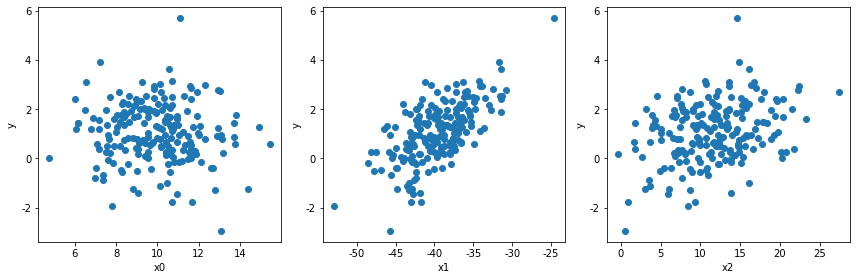

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X2[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

## 정규방정식으로 학습

In [99]:
X2_1 = np.hstack([np.ones((X2.shape[0], 1)), X2]) # 절편을 구하기 위해서 전부 값이 1인 열을 추가

In [127]:
beta_hat = np.dot(np.linalg.inv(np.matmul(X2_1.T, X2_1)),  np.dot(X2_1.T, y))

In [128]:
[(i, j ) for i,j in zip([beta_0, beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_1, beta_hat))

([(1, 8.80347166307444),
  (-0.2, -0.0601795922692232),
  (0.9, 0.2030377874265124),
  (0.3, 0.0788216995362907)],
 0.6428587489550194)

표준화가 되어 있지 않는다면 계수를 가지고 중요성, 상대적으로 분산이 큰 속성은 계수의 크기 작다.

## 경사하강법으로 학습

In [131]:
# 경사하강법을 함수화
def gradient_descent(X, y, learning_rate, epoch, random_state=9):
    np.random.seed(random_state)
    beta_hat =  np.random.rand(X.shape[1] + 1) * 2 - 1 # [-1, 1) 까지 랜덤 번호 생성
    beta_hat_0 = beta_hat[0]
    beta_hat = beta_hat[1:]
    loss_hist = []
    beta_hist = []
    for j in range(epoch):
        y_delta =  y - beta_hat_0 - np.matmul(X, beta_hat)
        beta_hat_delta_0 = -np.mean(y_delta)
        beta_hat_delta = -np.dot(X.T, y_delta) / n # 좀 더효율적이고 간결하다
        beta_hat_0 -= learning_rate * beta_hat_delta_0
        beta_hat -= learning_rate * beta_hat_delta
        y_hat = beta_hat_0 + np.matmul(X, beta_hat)
        loss = mean_squared_error(y, y_hat) # mse
        loss_hist.append(loss)
        beta_hist.append((beta_hat_0, beta_hat))
    return beta_hat_0, beta_hat, loss_hist, beta_hist
beta_hat_0, beta_hat,loss_hist, beta_hist = gradient_descent(X2, y, 0.001, 100)

In [133]:
(beta_0, beta_hat_0), [(i, j ) for i,j in zip([beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2, beta_hat) + beta_hat_0)

((1, -0.9680981578315895),
 [(-0.2, 0.06335524287309413),
  (0.9, -0.02108052872627008),
  (0.3, 0.043267782556658176)],
 1.472632825333718)

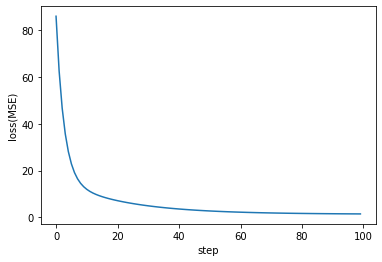

In [124]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

* scipy에 있는 최적화 알고리즘을 사용해본다.

> [scipy.optimize,minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 로 선형회귀모델을 학습한다. (method='Newton-CG')

In [160]:
def mse(beta_hat, X, y):
    r = y - np.dot(X, beta_hat)
    return np.dot(r, r)
def jac(beta_hat, X, y):
    y_delta =  y - np.dot(X, beta_hat)
    return -np.dot(X.T, y_delta) / X.shape[0]
result = minimize(mse, np.random.rand(X2_1.shape[1]), jac=jac, args=(X2_1, y), method='Newton-CG')
result

     fun: 128.5717497910053
     jac: array([ 3.22013891e-08,  1.15288288e-06, -3.51120097e-06, -1.32999695e-05])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 0
     nit: 5
    njev: 25
  status: 0
 success: True
       x: array([ 8.80347062, -0.06017957,  0.20303777,  0.0788217 ])

In [161]:
beta_hat = result.x
[(i, j ) for i,j in zip([beta_0, beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_1, beta_hat))

([(1, 8.803470622293585),
  (-0.2, -0.06017956543195355),
  (0.9, 0.2030377693034956),
  (0.3, 0.078821703644403)],
 0.6428587489550265)

직접만든 경사하강법보다 좋은 결과를 뽑아냈지만, 복잡한 데이터셋에서는 이 알고리즘도 정규화를 하지 않으면, 제대로 작동하지 않게 된다.  

## 정규화(Normalization)

* 표준정규분포로(Z-scaling)로 정규화를 진행해 본다.

$X\_std = \frac{(X-\bar{X})}{s}$

In [134]:
X2_std =  (X2 - np.mean(X2, axis=0)) / np.std(X2, axis=0) # Z-scaling

In [135]:
X2_std.shape, np.mean(X2_std), np.std(X2_std)

((200, 3), 3.1086244689504386e-17, 1.0)

[Practice]

X_std를 가지고 정규방정식을 이용하여 beta_hat을 구하시오.

In [136]:
X2_std_1 = np.hstack([np.ones((X2_std.shape[0], 1)), X2_std])
beta_hat = np.dot(np.linalg.inv(np.matmul(X2_std_1.T, X2_std_1)),  np.dot(X2_std_1.T, y))
beta_hat0, beta_hat1, beta_hat2  = beta_hat[0], beta_hat[1], beta_hat[2]

In [60]:
beta_1, beta_hat1, beta_2, beta_hat2

(-0.3, -0.33107123589311044, 0.8, 0.7796787945495445)

경사하강법으로 해보자.

In [141]:
beta_hat_0, beta_hat,loss_hist, beta_hist = gradient_descent(X2_std, y, 0.1, 100)

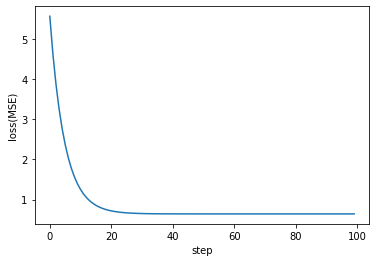

In [142]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

In [144]:
(beta_0, beta_hat_0), [(i, j ) for i,j in zip([beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_std, beta_hat) + beta_hat_0)

((1, 1.0668580186905179),
 [(-0.2, -0.11180052070328339),
  (0.9, 0.7995643018058106),
  (0.3, 0.3907272865967305)],
 0.6428587556659252)

[Practice]

scipy에 있는 최적화 알고리즘으로 학습해본다.

[scipy.optimize,minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 로 선형회귀모델을 학습한다.(method='Newton-CG')

In [146]:
from scipy.optimize import minimize

In [162]:
def mse(beta_hat, X, y):
    r = y - np.dot(X, beta_hat)
    return np.dot(r, r)
def jac(beta_hat, X, y):
    y_delta =  y - np.dot(X, beta_hat)
    return -np.dot(X.T, y_delta) / X.shape[0]
minimize(mse, np.random.rand(X2_std_1.shape[1]), jac=jac, args=(X2_std_1, y), method='Newton-CG')

     fun: 128.5717497910039
     jac: array([-1.65738823e-06, -3.56382762e-07,  5.11383033e-06,  3.85283197e-06])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 13
  status: 0
 success: True
       x: array([ 1.06691237, -0.11177438,  0.79958977,  0.39077976])

In [ ]:
from sklearn.datasets import make_regression

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) 회귀 분석 데이터셋을 만든다. 

n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True 로 해서 데이터셋 생성하여 입력 값은 X에 출력은 y 값, 계수는 coef에 설정.

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True)
X.shape, y.shape, coef

((100, 5),
 (100,),
 array([ 6.74479784, 71.20447834,  0.        ,  0.        , 50.7033102 ]))

각각의 속성과, y를 산포도 그래프로 시각화

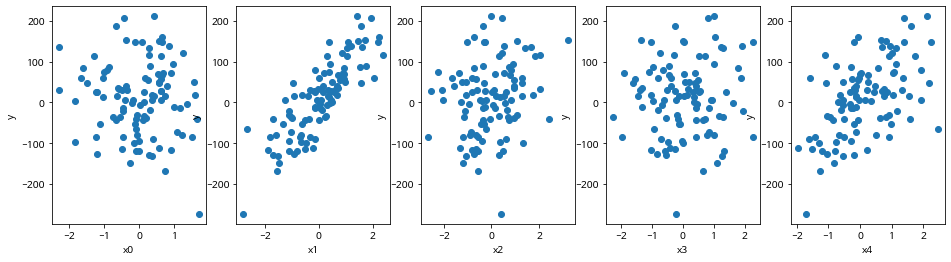

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.show()